# Visualización de datos

La visualización de datos hace parte del post-procesamiento de datos y es un paso complementario al análisis que ayuda a observar comportamientos generales de una forma visual y a la organización/presentación de los mismos.  

La visualización podemos separarla en herramientas para 2D y 3D, siendo algunas de estas herramientas especializadas para dicho fin y otras modulos de un lenguaje.  

En este curso nos centraremos al uso de dos herramientas especializadas para cada uno de los casos respectivos (GnuPlot y VTK/Paraview), pero no debemos ignorar la existencia de otras herramientas de interes para el mismo fin.  

En el mundo de la visualización 2D podemos encontrar los siguientes modulos (muchos de ellos poseen soporte para más de un lenguaje a traves de puentes).  

+ GnuPlot.
+ Processing: Desarrollado para JS y cuenta con soporte para python/notebook (PyProcessing).  
+ Bokeh: Desarrollado para python/notebook en JS, emulando la biblioteca de D3JS.  
+ D3JS: Desarrollado para JS.  
+ Plotly: Desarrollado para python/notebook en JS y cuenta con soporte para R.  
+ GGPlot: Desarrollado para R y cuenta con soporte para python.  
+ Matplotlib.  

Para los casos de 3D es posible generar visualizaciones planas a partir de algunas de las herramientas anteriores, pero cuyo control del escenario 3D es de muy bajo rendimiento. Para vistas 3D en sentido estricto podemos usar herramientas como las mencionadas a continuación.  

+ VTK/Paraview.  
+ [ThreeJS](https://threejs.org/): Desarrollado para JS y cuenta con soporte para python/notebook ([PyThreeJS](https://github.com/jovyan/pythreejs/)).  
+ VPython: Desarrollado para python 2.  
+ Mayavi: Desarrollado para python 2.  
+ [Vispy](https://github.com/vispy/vispy).  

Tambien existen herramientas auxiliares como Gmsh que permiten generar mallados y hacer visualización de estos. Estos mallados (2D y 3D) pueden ser exportados para su uso en VTK/Paraview.  

A parte de estos casos es posible crear las visualizaciones propias realizando un uso directo de opengl, webgl o vulcan, lo cual representa la manipulación a un nivel más bajo de los escenarios gráficos tanto 2D y 3D, o modulos de uso general de multimedia como SDL. Esto permite un gran nivel de personalización pero a costo de mayor trabajo de implementación.  

## GnuPlot

### Instalación

Para la instalación de los elementos necesarios en nuestro sistema ubuntu, procedemos a lo siguiente.  

Usando el gestor de paquetes realizamos la instalación de GnuPlot.

    apt -y install gnuplot

Ahora, para dar soporte al uso de gnuplot en el notebook procedemos a instalar el kernel.  

    pip install --upgrade --no-cache-dir git+https://github.com/has2k1/gnuplot_kernel.git@master  
    
Una vez creemos el notebook con el kernel de `gnuplot`, cada celda de código corresponderá a una celda ejecutada en el ambiente de este y la salida esta configurada por defecto para generar gráfico en linea.  

### Instrucciones GnuPlot

Gnuplot ofrece un lenguaje de soporte no solo para la generación de gráficos sino para una manipulación de cadena de caracteres, aritmetica, estadistica y archivos. De esta forma podemos crear no solo gráficos sino un análisis de los mismos y generación de datos.

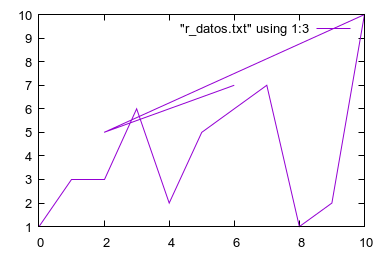

set output '/tmp/gnuplot-inline-1476838316.2664683.956870376096.png'
plot "r_datos.txt" using 1:3 with lines
unset output


In [1]:
plot "r_datos.txt" using 1:3 with lines

Si tenemos un archivo de datos podemos realizar un gráfico de forma muy simple invocando la instrucción `plot` seguido del nombre del archivo con la indicación de las columnas de interes para su relación y el tipo de grafico (en este caso fue de lineas). Algunas instrucciones de gnuplot poseen abreviaturas, y los casos más frecuentes son:  

| Abreviatura | Instrucción |
|:---:|:---:|
| u | using |
| s | smooth |
| s acs | smooth acsplines |
| t | title |
| w l | with lines |
| w lp | with linespoints |
| w p | with points |
| w d | with dots |
| set t | set terminal |
| set o | set output |
| set logsc | set logscale |

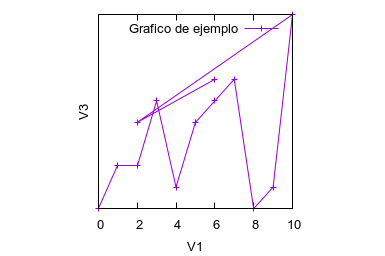

set xlabel "V1" # Asigna titulo a los ejes
set ylabel "V3"
set size square 1,1 # Conserva relacion de aspecto
unset ytics # Retira las marcas del eje "Y"
set output '/tmp/gnuplot-inline-1476838316.2997587.721792042365.png'
plot "r_datos.txt" u 1:3 t "Grafico de ejemplo" w lp # Se asigno titulo y grafico con lineas y puntos
unset output


In [2]:
set xlabel "V1" # Asigna titulo a los ejes
set ylabel "V3"
set size square 1,1 # Conserva relacion de aspecto
unset ytics # Retira las marcas del eje "Y"
plot "r_datos.txt" u 1:3 t "Grafico de ejemplo" w lp # Se asigno titulo y grafico con lineas y puntos

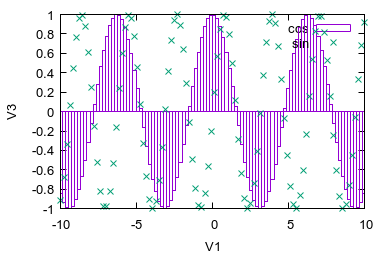

funcion_cos(x) = cos(a*x) # Definicion de funciones
funcion_sin(x) = sin(a*x)
set ytics
set size nosquare # Grafico sin conservacion de aspecto
set output '/tmp/gnuplot-inline-1476838316.3145518.420917542512.png'
plot a=1, funcion_cos(x) t "cos" w boxes,  a=2, funcion_sin(x) t "sin" w p # Grafico sobrepuestos y parametricos
unset output


In [3]:
funcion_cos(x) = cos(a*x) # Definicion de funciones
funcion_sin(x) = sin(a*x)
set ytics
set size nosquare # Grafico sin conservacion de aspecto
plot a=1, funcion_cos(x) t "cos" w boxes, \
a=2, funcion_sin(x) t "sin" w p # Grafico sobrepuestos y parametricos

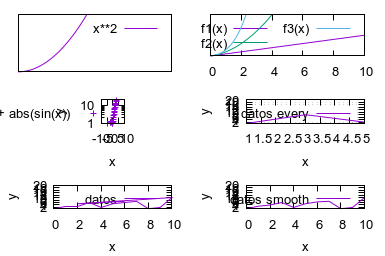

# Equivale a `set terminal`
# `set output` se usa para el achivo donde se almacena

set output '/tmp/gnuplot-inline-1476838316.3285098.268111600256.png'
set multiplot layout 3,2

set size nosquare
set xrange [0:10]
set yrange [0:20]
unset xlabel
unset ylabel
unset xtics
unset ytics
plot x**2

f1(x)=x
f2(x)=x**2+x
f3(x)=x**3+x**2+x
set xtics
plot f1(x), f2(x), f3(x)

set size square
unset xrange
set yrange [1:20]
set xlabel "x"
set ylabel "y"
set ytics
set xtics
set logsc y
f(x) = exp(x) + abs(sin(x))
plot f(x) t "exp(x) + abs(sin(x))" w p

set size nosquare
set grid
unset logsc y
plot "r_datos.txt" every 2::1::5 u 1:2 t "datos every" w l

unset grid
plot "r_datos.txt" u 1:3 t "datos" w l
plot "r_datos.txt" u 1:3 smooth unique t "datos smooth" w l

unset multiplot
unset output


In [4]:
%gnuplot inline
# Equivale a `set terminal`
# `set output` se usa para el achivo donde se almacena

set multiplot layout 3,2

set size nosquare
set xrange [0:10]
set yrange [0:20]
unset xlabel
unset ylabel
unset xtics
unset ytics
plot x**2

f1(x)=x
f2(x)=x**2+x
f3(x)=x**3+x**2+x
set xtics
plot f1(x), f2(x), f3(x)

set size square
unset xrange
set yrange [1:20]
set xlabel "x"
set ylabel "y"
set ytics
set xtics
set logsc y
f(x) = exp(x) + abs(sin(x))
plot f(x) t "exp(x) + abs(sin(x))" w p

set size nosquare
set grid
unset logsc y
plot "r_datos.txt" every 2::1::5 u 1:2 t "datos every" w l

unset grid
plot "r_datos.txt" u 1:3 t "datos" w l
plot "r_datos.txt" u 1:3 smooth unique t "datos smooth" w l

unset multiplot

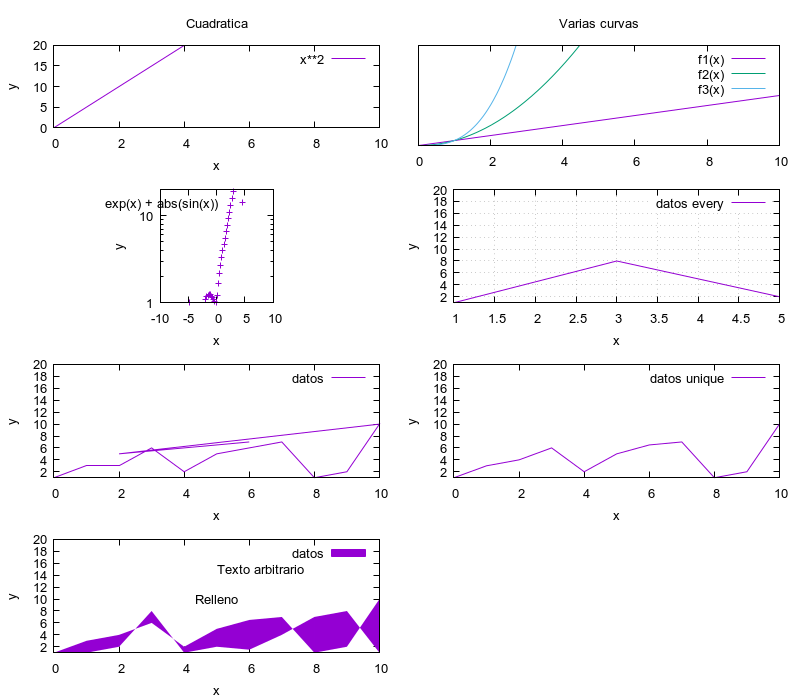

set output '/tmp/gnuplot-inline-1476838316.3629901.865681417134.png'
set multiplot layout 4,2

unset label
set title "Cuadratica"
set size nosquare
set xrange [0:10]
set yrange [0:20]
set samples 3
plot x**2

set title "Varias curvas"
set samples 300
f1(x)=x
f2(x)=x**2
f3(x)=x**3
unset xlabel
unset ylabel
unset ytics
plot f1(x), f2(x), f3(x)

unset title
unset samples
set size square
unset xrange
set yrange [1:20]
set xlabel "x"
set ylabel "y"
set ytics
set xtics
set logsc y
f(x) = exp(x) + abs(sin(x))
plot f(x) t "exp(x) + abs(sin(x))" w p

set size nosquare
set grid
unset logsc y
plot "r_datos.txt" every 2::1::5 u 1:2 t "datos every" w l

unset grid
plot "r_datos.txt" u 1:3 t "datos" w l
plot "r_datos.txt" u 1:3 smooth unique t "datos unique" w l

set label "Relleno" at 5,10 center
set label "Texto arbitrario" at 5,15 left
plot "r_datos.txt" u 1:2:3 smooth unique t "datos" w filledcurves

unset multiplot
unset output


In [5]:
%gnuplot inline pngcairo font "Arial,10" size 800,700
set multiplot layout 4,2

unset label
set title "Cuadratica"
set size nosquare
set xrange [0:10]
set yrange [0:20]
set samples 3
plot x**2

set title "Varias curvas"
set samples 300
f1(x)=x
f2(x)=x**2
f3(x)=x**3
unset xlabel
unset ylabel
unset ytics
plot f1(x), f2(x), f3(x)

unset title
unset samples
set size square
unset xrange
set yrange [1:20]
set xlabel "x"
set ylabel "y"
set ytics
set xtics
set logsc y
f(x) = exp(x) + abs(sin(x))
plot f(x) t "exp(x) + abs(sin(x))" w p

set size nosquare
set grid
unset logsc y
plot "r_datos.txt" every 2::1::5 u 1:2 t "datos every" w l

unset grid
plot "r_datos.txt" u 1:3 t "datos" w l
plot "r_datos.txt" u 1:3 smooth unique t "datos unique" w l

set label "Relleno" at 5,10 center
set label "Texto arbitrario" at 5,15 left
plot "r_datos.txt" u 1:2:3 smooth unique t "datos" w filledcurves

unset multiplot

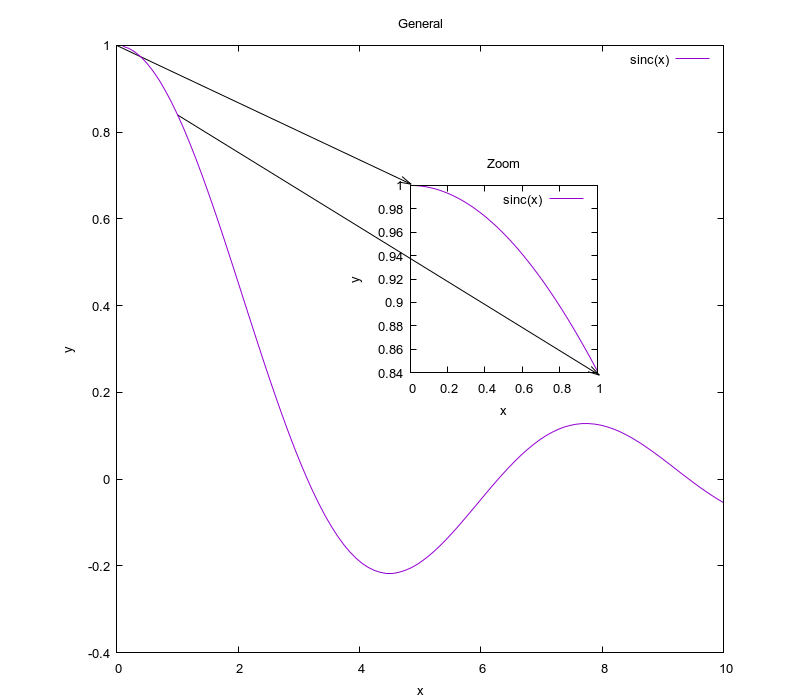

set output '/tmp/gnuplot-inline-1476838316.4454947.704553207957.png'
set multiplot

set title "General"
set size square 1,1
set origin 0,0
sinc(x)= sin(x)/x
unset yrange
set xrange [0:10]
set xlabel "x"
set xtics
set ytics
unset arrow
set arrow from 0,1 to 4.85,.68
set arrow from 1,.84 to 7.95,.24
plot sinc(x) w l



set title "Zoom"
set size .4,.4
set origin .4,.4
set xrange [0:1]
unset arrow
plot sinc(x) w l

unset multiplot
unset output


In [6]:
set multiplot

set title "General"
set size square 1,1
set origin 0,0
sinc(x)= sin(x)/x
unset yrange
set xrange [0:10]
set xlabel "x"
set xtics
set ytics
unset arrow
set arrow from 0,1 to 4.85,.68
set arrow from 1,.84 to 7.95,.24
plot sinc(x) w l



set title "Zoom"
set size .4,.4
set origin .4,.4
set xrange [0:1]
unset arrow
plot sinc(x) w l

unset multiplot

In [7]:
print exp(2.5) + rand(0)

print exp(2.5) + rand(0)
12.404951401678
unset output


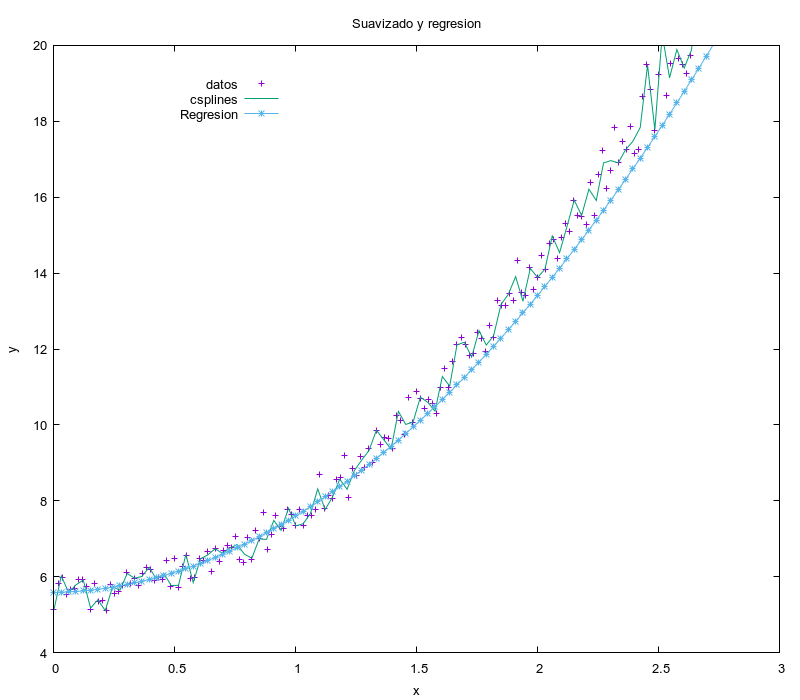


cuad(x) = (5 + rand(0)) + (.3*rand(0)+2)*x**2

# Escritura de archivo
archivo="datos_gnuplot.txt"
set print archivo
do for [t=0:300]{
f=cuad(t/60.)
print t/60.,f
}
set print

fit_fun(x)=a+b*x+c*x**2
fit fit_fun(x) archivo via a,b,c
iter      chisq       delta/lim  lambda   a             b             c            
   0 7.3005862069e+02   0.00e+00  1.23e+00    2.000000e+00   1.000000e+00   1.000000e+00
   1 4.9355000626e+00  -1.47e+07  1.23e-01    5.378742e+00   1.035625e+00   1.090327e+00
   2 4.6087326083e+00  -7.09e+03  1.23e-02    5.575687e+00   1.851245e-01   1.831908e+00
   3 4.6070765721e+00  -3.59e+01  1.23e-03    5.587929e+00   1.156713e-01   1.898841e+00
   4 4.6070765709e+00  -2.63e-05  1.23e-04    5.587939e+00   1.156119e-01   1.898899e+00
iter      chisq       delta/lim  lambda   a             b             c            

After 4 iterations the fit converged.
final sum of squares of residuals : 4.60708
rel. change during last iteration : -2.62524e-10

degrees of freedom   

In [8]:
%gnuplot inline pngcairo font "Arial,10" size 800,700

cuad(x) = (5 + rand(0)) + (.3*rand(0)+2)*x**2

# Escritura de archivo
archivo="datos_gnuplot.txt"
set print archivo
do for [t=0:300]{
f=cuad(t/60.)
print t/60.,f
}
set print

fit_fun(x)=a+b*x+c*x**2
fit fit_fun(x) archivo via a,b,c

unset label
set xrange [0:3]
set yrange [4:20]
set origin 0,0
set size nosquare 1,1
set title "Suavizado y regresion"
# set key outside
set key at 0.5,18 left bottom
plot archivo u 1:2 t "datos" w p, \
"" t "csplines" smooth csplines w l, \
fit_fun(x) t "Regresion" w lp

# Bibliografía

1. [GnuPlot](http://gnuplot.info).  
1. [GnuPlot Kernel](https://github.com/has2k1/gnuplot_kernel).  
1. Gnuplot in Action: Understanding Data with Graphs. Philipp K. Janert. Manning Publications; 1 edition (August 28, 2009).  
1. [GnuPlot Card](http://www.gnuplot.info/docs_4.0/gpcard.pdf).